## Predicting Car Prices

In the course, we explored the fundamentals of machine learning using the k-nearest neighbors algorithm. In this project, we'll practice the machine learning workflow we've learned so far to predict a car's market price using its attributes. 

The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. 

## Introduction to the data set

Let's first read the data into a dataframe and explore the data set.

In [1]:
import pandas as pd
cols = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_doors', 'body_style',
       'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 
        'engine_type', 'num_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio',
       'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
cars = pd.read_csv("imports-85.data", header = None, names = cols)
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In all the columns, there are numeric ones as follows:
   + normalized_losses
   + wheel_base
   + length
   + width
   + height
   + curb_weight
   + engine_size
   + bore
   + stroke
   + compression_ratio
   + horsepower
   + peak_rpm
   + city_mpg
   + highway_mpg
   + price
   
The 'price' column is the target column.

## Data Cleaning

As we learned in the course, we usually can't have any missing values if we want to use them for predictive modeling. Based on the data set preview from the last step, we can tell that the normalized-losses column contains missing values represented using "?". Let's replace these values and look for the presence of missing values in other numeric columns. Let's also rescale the values in the numeric columns so they all range from 0 to 1.

In [2]:
import numpy as np
cars = cars.replace('?', np.nan)
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Next let's calculate the number of rows that have a missing value for the 'normalized_losses' column.

In [3]:
cars['normalized_losses'].value_counts(normalize = True, dropna = False)

NaN    0.200000
161    0.053659
91     0.039024
150    0.034146
134    0.029268
104    0.029268
128    0.029268
102    0.024390
94     0.024390
65     0.024390
103    0.024390
85     0.024390
74     0.024390
168    0.024390
95     0.024390
148    0.019512
106    0.019512
93     0.019512
118    0.019512
122    0.019512
101    0.014634
137    0.014634
115    0.014634
125    0.014634
154    0.014634
83     0.014634
197    0.009756
129    0.009756
81     0.009756
164    0.009756
89     0.009756
113    0.009756
108    0.009756
87     0.009756
158    0.009756
192    0.009756
188    0.009756
119    0.009756
153    0.009756
145    0.009756
110    0.009756
194    0.009756
107    0.004878
256    0.004878
231    0.004878
98     0.004878
90     0.004878
186    0.004878
78     0.004878
142    0.004878
77     0.004878
121    0.004878
Name: normalized_losses, dtype: float64

In [4]:
cars['normalized_losses'].isnull().sum()

41

41 rows, about 20% of 'normalized_losses' column have missing values. If we drop these rows entirely, we'll lose a lot of information. Instead, We'll replace the missing values using the average values from that column.

Let's extract the other numeric columns and explore the missing value counts for the other numeric columns.

In [5]:
numeric_col = ['normalized_losses', 'wheel_base', 'length', 'width', 'height', 
               'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio',
               'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
numeric_cars = cars[numeric_col]
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
normalized_losses    164 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_size          205 non-null int64
bore                 201 non-null object
stroke               201 non-null object
compression_ratio    205 non-null float64
horsepower           203 non-null object
peak_rpm             203 non-null object
city_mpg             205 non-null int64
highway_mpg          205 non-null int64
price                201 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 24.1+ KB


We noticed that there are 4 missing values in 'price' column. We don't expect any missing value in this column. Here we will delete these 4 rows.

In [6]:
numeric_cars = numeric_cars.dropna(subset=['price'])
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 15 columns):
normalized_losses    164 non-null object
wheel_base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb_weight          201 non-null int64
engine_size          201 non-null int64
bore                 197 non-null object
stroke               197 non-null object
compression_ratio    201 non-null float64
horsepower           199 non-null object
peak_rpm             199 non-null object
city_mpg             201 non-null int64
highway_mpg          201 non-null int64
price                201 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 25.1+ KB


Now we have all missing values removed in 'price' column. Next, we will cast all the non-numeric values into numeric type('float' here).

In [7]:
numeric_cars = numeric_cars.astype('float')
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 15 columns):
normalized_losses    164 non-null float64
wheel_base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb_weight          201 non-null float64
engine_size          201 non-null float64
bore                 197 non-null float64
stroke               197 non-null float64
compression_ratio    201 non-null float64
horsepower           199 non-null float64
peak_rpm             199 non-null float64
city_mpg             201 non-null float64
highway_mpg          201 non-null float64
price                201 non-null float64
dtypes: float64(15)
memory usage: 25.1 KB


We will replace the rest missing values with the average value of their columns.

In [8]:
numeric_cars = numeric_cars.fillna(numeric_cars.mean())
print(numeric_cars.info())
numeric_cars.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 15 columns):
normalized_losses    201 non-null float64
wheel_base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb_weight          201 non-null float64
engine_size          201 non-null float64
bore                 201 non-null float64
stroke               201 non-null float64
compression_ratio    201 non-null float64
horsepower           201 non-null float64
peak_rpm             201 non-null float64
city_mpg             201 non-null float64
highway_mpg          201 non-null float64
price                201 non-null float64
dtypes: float64(15)
memory usage: 25.1 KB
None


,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


Great! Now we're done with the data cleaning. Let's move on to the normalization of the data using the method we learned in the course.

In [9]:
normalized_cars = (numeric_cars-numeric_cars.mean())/numeric_cars.std()
normalized_cars['price'] = numeric_cars['price']
normalized_cars.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0.000000,-1.680910,-0.438315,-0.851335,-2.029015,-0.014821,0.075201,0.519597,-1.825369,-0.290709,0.203476,-0.245942,-0.650624,-0.540937,13495.0
1,0.000000,-1.680910,-0.438315,-0.851335,-2.029015,-0.014821,0.075201,0.519597,-1.825369,-0.290709,0.203476,-0.245942,-0.650624,-0.540937,16500.0
2,0.000000,-0.708334,-0.243544,-0.185134,-0.558319,0.516789,0.604724,-2.427374,0.674254,-0.290709,1.354267,-0.245942,-0.961995,-0.687669,16500.0
3,1.312654,0.165335,0.194690,0.147966,0.217881,-0.422710,-0.430252,-0.524899,0.452769,-0.041019,-0.037387,0.799836,-0.183569,-0.100741,13950.0
4,1.312654,0.099398,0.194690,0.243137,0.217881,0.518722,0.219617,-0.524899,0.452769,-0.540399,0.310527,0.799836,-1.117680,-1.274597,17450.0


## Univariate Model

Let's start with some univariate k-nearest neighbors models. Starting with simple models before moving to more complex models helps us structure your code workflow and understand the features better.

Here we'll create a function, named knn_train_test() that encapsulates the training and simple validation process. This function should have 3 parameters--training column name, target column name, and the dataframe object.

   + This function should split the data set into a training and test set.
   + Then, it should instantiate the KNeighborsRegressor class, fit the model on the training set, and make predictions on the test set.
   + Finally, it should calculate the RMSE(root mean squared error) and return that value.
   
Now let's write this function.

In [10]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy

#Randomize the dataset.
numpy.random.seed(1)
rand_index = numpy.random.permutation(normalized_cars.index)
rand_df = normalized_cars.reindex(rand_index)
split_index = int(len(rand_df)/2)
#Split the dataframe into training set and test set.
train_df = rand_df.iloc[0:split_index]
test_df = rand_df.iloc[split_index:]

def knn_train_test(train, target):
    #Instantiate the KNeighborsRegressor class with default k value.
    knn = KNeighborsRegressor()
    knn.fit(train_df[[train]], train_df[target])
    predictions = knn.predict(test_df[[train]])
    mse = mean_squared_error(test_df[target], predictions)
    rmse = numpy.sqrt(mse)
    return rmse

rmse_result= {}
numeric_columns = rand_df.columns.drop('price')
for col in numeric_columns:
    rmse = knn_train_test(col, 'price')
    rmse_result[col] = rmse
    
rmse_series = pd.Series(rmse_result)
rmse_series.sort_values()

engine_size          3297.699744
horsepower           4047.376555
curb_weight          4453.680703
highway_mpg          4625.047587
city_mpg             4754.637378
width                4772.510209
length               5429.644740
wheel_base           5461.490336
compression_ratio    6606.571346
bore                 6793.057484
normalized_losses    7337.284820
peak_rpm             7643.070323
stroke               8006.096427
height               8132.467732
dtype: float64

As shown above, among univariate models, 'engine_size' column performed the best using the default k value. What will happen if we change the k values?

Let's rewrite the function to accept a parameter for the k value.

In [11]:
k_values = [1, 3, 5, 7, 9]
def knn_train_test_k(train, target, k_v):
    #Instantiate the KNeighborsRegressor class with customized k value.
    knn = KNeighborsRegressor(n_neighbors = k_v)
    knn.fit(train_df[[train]], train_df[target])
    predictions = knn.predict(test_df[[train]])
    mse = mean_squared_error(test_df[target], predictions)
    rmse = numpy.sqrt(mse)
    return rmse

rmse_result_kvalues = {}
for col in numeric_columns:
    k_rmse_result = {}
    for k in k_values:
        rmse = knn_train_test_k(col, 'price', k)
        k_rmse_result[k] = rmse
    rmse_result_kvalues[col] = k_rmse_result
    
rmse_kvalues_df = pd.DataFrame(rmse_result_kvalues)
print(rmse_kvalues_df)    

          bore     city_mpg  compression_ratio  curb_weight  engine_size  \
1  8602.588485  5901.143574        8083.070178  5288.019573  3227.659787   
3  6977.123412  4608.180446        7379.623322  5011.878915  2946.741788   
5  6793.057484  4754.637378        6606.571346  4453.680703  3297.699744   
7  6828.867808  5035.456897        6732.032905  4330.149365  3563.435099   
9  6865.299025  5333.161658        7019.951251  4632.925251  3831.764971   

        height  highway_mpg   horsepower       length  normalized_losses  \
1  8904.046456  6025.594967  4170.054848  4577.003915        7779.606038   
3  8277.609643  4627.908507  4010.521803  5087.460277        7480.692361   
5  8132.467732  4625.047587  4047.376555  5429.644740        7337.284820   
7  7704.344964  4722.975581  4383.729139  5307.702178        7795.000931   
9  7779.564693  5201.019510  4505.969442  5383.054515        7705.824547   

      peak_rpm       stroke   wheel_base        width  
1  9511.480068  9116.495955  4

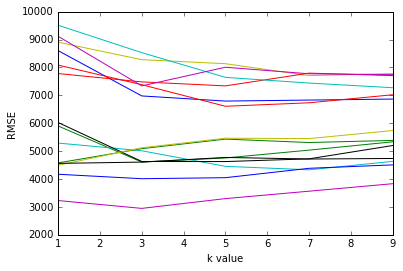

In [12]:
#Visualize the result using a scatter plot.
import matplotlib.pyplot as plt
%matplotlib inline
rmse_kvalues_df.plot.line(legend = False)
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.show()

Within the numeric columns, five of them have the lowest rmse with the k value of 3, and four of them have the lowest rmse with the k value of 5.

## Multivariate Model

Let's modify the knn_train_test() function we wrote in the last step to work with multiple columns.

We'll modify the function to accept a list of column names (instead of just a string). For now we will use the default k value, and we'll tune the k value in the next step.

We'll try the following combinations:

   + Instead of using just a single column for train and test, use all of the columns passed in.
   + Use the best 2 features from the previous step to train and test a multivariate k-nearest neighbors model using the default k value.
   + Use the best 3 features from the previous step to train and test a multivariate k-nearest neighbors model using the default k value.
   + Use the best 4 features from the previous step to train and test a multivariate k-nearest neighbors model using the default k value.
   + Use the best 5 features from the previous step to train and test a multivariate k-nearest neighbors model using the default k value.

In [13]:
#Compute the average rmse accross different k value for each column.
print(rmse_kvalues_df.mean().sort_values())

engine_size          3373.460278
horsepower           4223.530357
width                4678.052063
curb_weight          4743.330761
highway_mpg          5040.509230
city_mpg             5126.515991
length               5156.973125
wheel_base           5252.436179
compression_ratio    7164.249800
bore                 7213.387243
normalized_losses    7619.681739
stroke               7993.732370
peak_rpm             8078.822375
height               8159.606698
dtype: float64


In [14]:
feature_in_order = rmse_kvalues_df.mean().sort_values().index
print(feature_in_order)

Index(['engine_size', 'horsepower', 'width', 'curb_weight', 'highway_mpg',
       'city_mpg', 'length', 'wheel_base', 'compression_ratio', 'bore',
       'normalized_losses', 'stroke', 'peak_rpm', 'height'],
      dtype='object')


In [15]:
feature_num = [2, 3, 4, 5, len(feature_in_order)]
rmse_feature_numbers = {}
def knn_train_test_multivariate(features, target, feature_number):
    #Instantiate the KNeighborsRegressor class with customized k value.
    knn = KNeighborsRegressor()
    knn.fit(train_df[features[0:feature_number]], train_df[target])
    predictions = knn.predict(test_df[features[0:feature_number]])
    mse = mean_squared_error(test_df[target], predictions)
    rmse = numpy.sqrt(mse)
    return rmse
for num in feature_num:
    rmse = knn_train_test_multivariate(feature_in_order, 'price', num)
    rmse_feature_numbers[num] = rmse

print(rmse_feature_numbers)

{2: 2938.1306900277887, 3: 3576.5381752208214, 4: 3435.145837075945, 5: 3457.4725012114936, 14: 3730.068922889355}


The result indicated that with two features, the model performed the best. With four and five features, the models performed better than the rest.

## Hyperparameter Tuning

Let's now optimize the model that performed the best in the previous step.

We'll choose the best three models in the last step, and vary the hyperparameter value from 1 to 25 and plot the resulting RMSE values.

In [16]:
k_values = [i for i in range(1, 26)]
feature_num = [2, 4, 5]
rmse_multivariate_kvalue = {}
def knn_train_test_multivariate_k(features, target, feature_number, k_v):
    #Instantiate the KNeighborsRegressor class with customized k value.
    knn = KNeighborsRegressor(n_neighbors = k_v)
    knn.fit(train_df[features[0:feature_number]], train_df[target])
    predictions = knn.predict(test_df[features[0:feature_number]])
    mse = mean_squared_error(test_df[target], predictions)
    rmse = numpy.sqrt(mse)
    return rmse
for num in feature_num:
    rmse_kvalue = {}
    for k in k_values:
        rmse = knn_train_test_multivariate_k(feature_in_order, 'price', num, k)
        rmse_kvalue[k] = rmse
    rmse_multivariate_kvalue[num] = rmse_kvalue

rmse_multivariate_kvalue_df = pd.DataFrame(rmse_multivariate_kvalue)
print(rmse_multivariate_kvalue_df)    

              2            4            5
1   2824.828708  2734.943457  2497.703948
2   2615.442453  3094.990918  2868.726166
3   2676.652148  3079.423322  3001.769441
4   2831.784120  3207.401446  3271.795490
5   2938.130690  3435.145837  3457.472501
6   3128.516969  3644.905718  3666.511817
7   3204.055439  3639.209219  3636.367312
8   3459.882605  3801.023683  3847.978916
9   3715.847780  3839.085309  3866.743418
10  3980.307424  3966.852486  3987.374931
11  4151.348212  4081.493685  4106.189726
12  4231.233582  4203.255322  4170.144026
13  4321.751666  4280.433927  4335.025937
14  4366.489860  4312.762148  4418.156226
15  4487.120413  4377.178254  4396.651193
16  4591.609217  4429.742403  4402.239525
17  4683.284404  4409.361305  4376.680455
18  4739.084337  4416.406551  4440.081780
19  4784.099214  4466.986486  4499.442587
20  4777.706747  4515.818654  4554.460823
21  4816.391896  4573.459748  4577.501318
22  4806.480777  4642.593680  4654.783949
23  4832.819315  4639.899018  4708

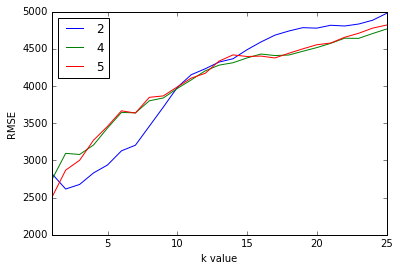

In [17]:
##Visualize the result with a line plot.
rmse_multivariate_kvalue_df.plot.line()
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.show()

For two best features, the model with the k value of 2 performed the best, while the k value of 1 is optimal for the models with four and five features. The bigger the k value, the bigger the rmse. The explanation for this should be that the variances account for the difference. The bigger the k value, the more neighbors involved.

## Conclusions and Future Directions

In this project, we created functions to generate univariate and multivariate models to predict the price of cars. We tuned our hyperparameters using grid search.

In the future, here are some ideas for next steps:

   + Modify the knn_train_test() function to use k-fold cross validation instead of train/test validation.